In [141]:
# plots
import matplotlib.pyplot as plt
import seaborn as sns

# data manipulation
import pandas as pd
import numpy as np

In [2]:
# loading dataset
df = pd.read_csv(filepath_or_buffer="dataset/insurance_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [4]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [5]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


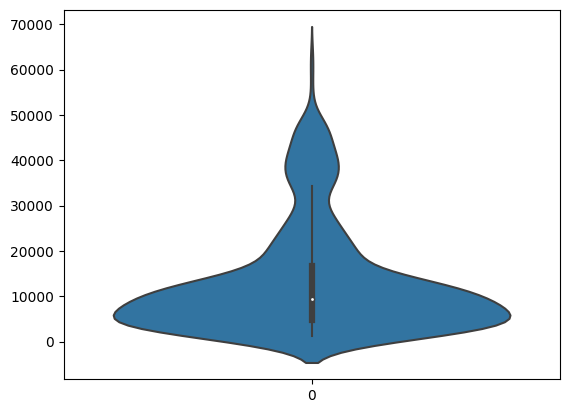

In [10]:
# Most of the isurance claim is aroung ~8,000 and a little group around ~40,000
sns.violinplot(data=df["claim"])
plt.show()

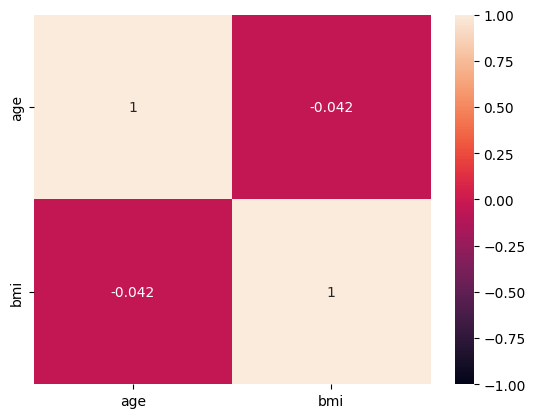

In [9]:
# Checking if there is any correlation between age and bmi data
sns.heatmap(data=df[["age", "bmi"]].corr(), annot=True, vmax=1, vmin=-1)
plt.show()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_4992\1140623027.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.drop(labels=["index", "PatientID"], axis=1).corr(), annot=True, vmax=1, vmin=-1)


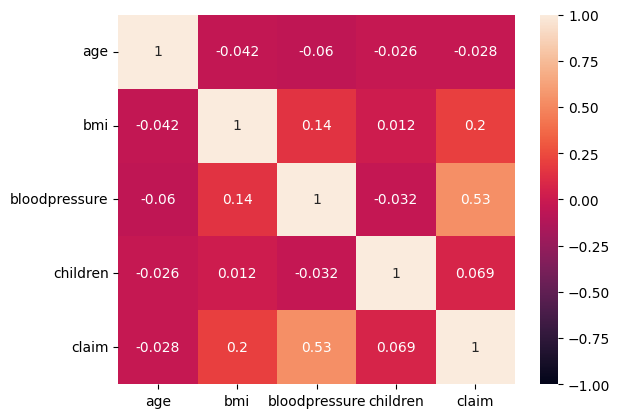

In [15]:
# Is it possible to see some of correlation between claim and the bloodpressure
# And bloodpressure has 0.14 of correlation with bmi, it is not so much but this
# correlation makes senses
sns.heatmap(data=df.drop(labels=["index", "PatientID"], axis=1).corr(), annot=True, vmax=1, vmin=-1)
plt.show()

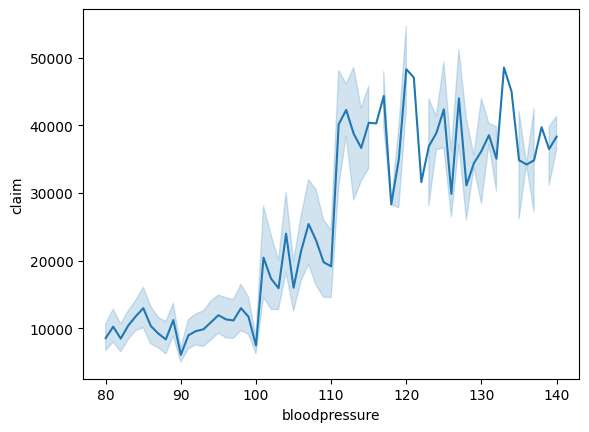

In [34]:
sns.lineplot(data=df, x="bloodpressure", y="claim")
plt.show()

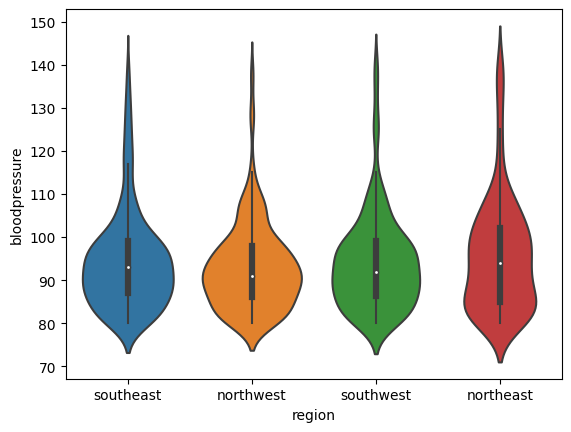

In [35]:
sns.violinplot(data=df, x="region", y="bloodpressure")
plt.show()

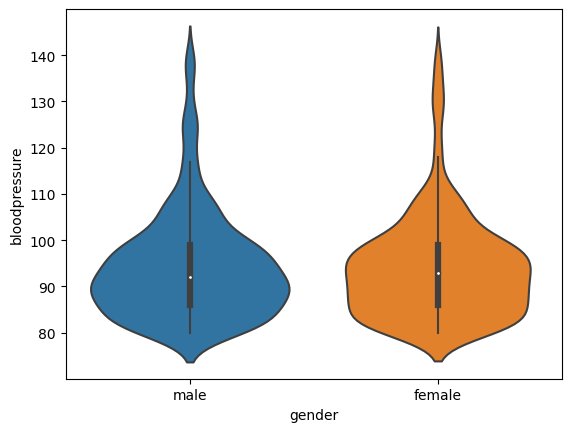

In [36]:
sns.violinplot(data=df, x="gender", y="bloodpressure")
plt.show()

In [37]:
diabetic_dummies = pd.get_dummies(data=df["diabetic"])

In [39]:
diabetic_dummies.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [38]:
df_3 = pd.concat(objs=[df, diabetic_dummies], axis=1)

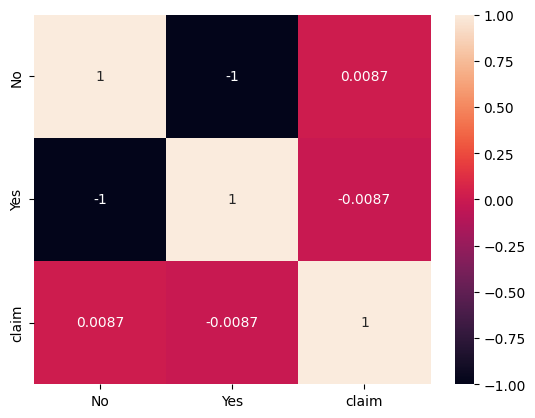

In [41]:
sns.heatmap(data=df_3[["No", "Yes", "claim"]].corr(), annot=True)
plt.show()

In [42]:
smoker_dummies = pd.get_dummies(data=df["smoker"])

In [43]:
smoker_dummies.head()

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [44]:
df_4 = pd.concat(objs=[df, smoker_dummies], axis=1)

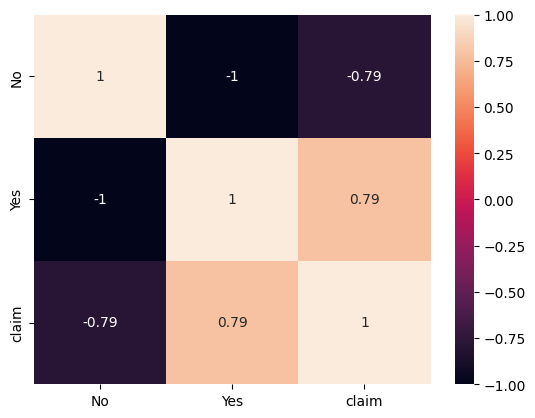

In [45]:
sns.heatmap(data=df_4[["No", "Yes", "claim"]].corr(), annot=True)
plt.show()

In [52]:
group_by_region = df.groupby(by="region")

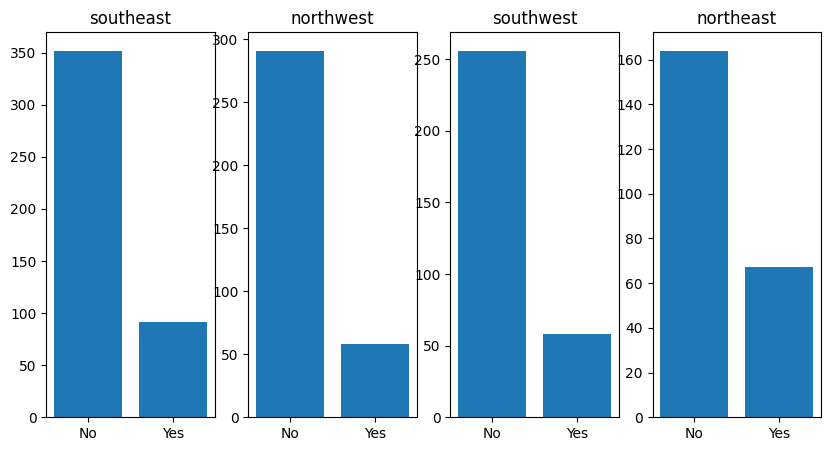

In [95]:
data = group_by_region["smoker"].value_counts()

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,5))
for index, regions in enumerate([_ for _ in df["region"].unique() if not pd.isna(_)]):
    ax[index].bar(x=data[regions].index, height=data[regions].values)
    ax[index].set_title(regions)

plt.show()

In [96]:
group_by_smoker = df.groupby(by="smoker")

In [97]:
group_by_smoker["claim"].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,1066.0,8421.121576,5995.843246,1121.87,3975.185,7341.415,11361.235,36910.61
Yes,274.0,32050.231971,11541.547338,12829.46,20826.245,34456.350,41019.205,63770.43


In [133]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer,StandardScaler
from sklearn.pipeline import Pipeline

In [123]:
final_df = df[["smoker", "bloodpressure", "claim"]]

key_map = {"Yes": 1, "No": 0}
final_df["smoker"] = final_df["smoker"].map(key_map)

C:\Users\Matheus\AppData\Local\Temp\ipykernel_4992\4176832449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["smoker"] = final_df["smoker"].map(key_map)


In [124]:
final_df.head()

,smoker,bloodpressure,claim
0,0,91,1121.87
1,0,87,1131.51
2,0,82,1135.94
3,0,80,1136.40
4,0,100,1137.01


In [168]:
tree_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("tree", DecisionTreeRegressor()),
])
linear_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("linear", LinearRegression()),
])

tree_param_grid = {
    "tree__max_depth": [2,3,4,5,8,10,12,15,18,22,25,30,32,35,40],
    "tree__criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"]
}

tree_searcher = GridSearchCV(estimator=tree_pipeline, param_grid=tree_param_grid)

In [170]:
x = final_df.drop(labels="claim", axis=1)
y = final_df["claim"]

In [171]:
xtrain, xval, ytrain, yval = train_test_split(x, y, train_size=0.7, random_state=32, shuffle=True)

In [172]:
tree_searcher.fit(xtrain, ytrain)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('tree', DecisionTreeRegressor())]),
             param_grid={'tree__criterion': ['squared_error', 'friedman_mse',
                                             'absolute_error', 'poisson'],
                         'tree__max_depth': [2, 3, 4, 5, 8, 10, 12, 15, 18, 22,
                                             25, 30, 32, 35, 40]})

In [173]:
linear_pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()), ('linear', LinearRegression())])

In [174]:
tree_searcher.score(xval, yval)

0.7021195887486706

In [175]:
linear_pipeline.score(xval, yval)

0.6794074056580086

In [176]:
tree_searcher.best_params_

{'tree__criterion': 'squared_error', 'tree__max_depth': 3}